In [111]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
import pandas.plotting as pd_plot
import scipy as sc
from pandas import DataFrame
import statsmodels.api as sm
from bioinfokit.analys import stat

In [112]:
def mean_CI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = se * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96 / np.sqrt(n-1)
    return m, m - h, m + h

## Exercise 6.1
#### The file haemoglob.dta contains the haemoglobin data used at the lectures day 6. Here we will go through the analysis of these data in Stata. 
### 1) Make a scatter plot of the haemoglobin levels against the type

In [126]:
haemoglob = pd.read_csv('data/haemoglob.csv', sep=',', decimal=".")

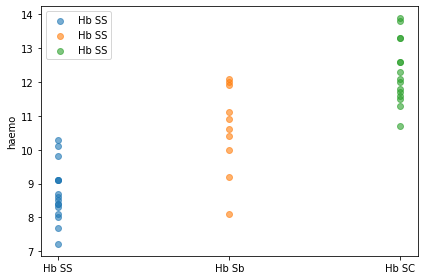

In [114]:
%matplotlib inline

haemoglob_SS = haemoglob.loc[haemoglob['type'] == 'Hb SS']
haemoglob_Sb = haemoglob.loc[haemoglob['type'] == 'Hb Sb']
haemoglob_SC = haemoglob.loc[haemoglob['type'] == 'Hb SC']


fig, ax = plt.subplots(1, 1)
ax.scatter(np.ones(len(haemoglob_SS)), haemoglob_SS['haemo'], color='C0', alpha=0.6, label='Hb SS')
ax.scatter(np.ones(len(haemoglob_Sb))*2, haemoglob_Sb['haemo'], color='C1', alpha=0.6, label='Hb SS')
ax.scatter(np.ones(len(haemoglob_SC))*3, haemoglob_SC['haemo'], color='C2', alpha=0.6, label='Hb SS')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Hb SS', 'Hb Sb', 'Hb SC'])
ax.set_ylabel('haemo')
ax.legend()
plt.tight_layout()
plt.show()

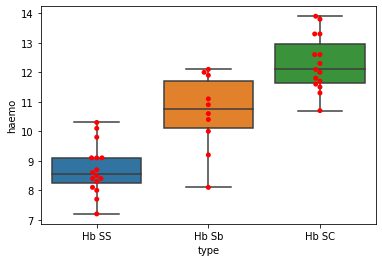

In [115]:
import seaborn as sns

fig, ax = plt.subplots(1, 1)
ax = sns.boxplot(x='type', y='haemo', data=haemoglob)
ax = sns.swarmplot(x='type', y='haemo', data=haemoglob, color='red')
plt.show()

### 2) Make the three QQ-plots. 

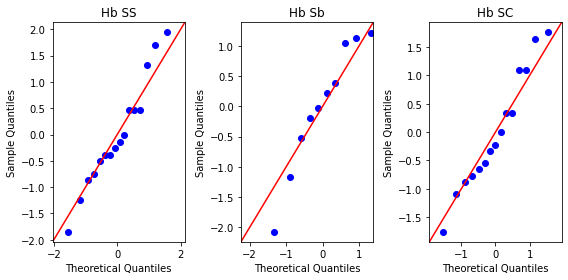

In [116]:
%matplotlib inline
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 3, 1)
sm.graphics.qqplot(haemoglob_SS['haemo'], ax=ax1, fit=True, line='45')
ax1.set_title('Hb SS')

ax2 = fig.add_subplot(1, 3, 2)
sm.graphics.qqplot(haemoglob_Sb['haemo'], ax=ax2, fit=True, line='45')
ax2.set_title('Hb Sb')

ax3 = fig.add_subplot(1, 3, 3)
sm.graphics.qqplot(haemoglob_SC['haemo'], ax=ax3, fit=True, line='45')
ax3.set_title('Hb SC')

plt.tight_layout()
plt.show()


The data sets appear to be normally distributed

### 3)  Find:
#### a) The count, mean and standard deviation in each group.

In [117]:
print('Hb SS group:  number of observations=', len(haemoglob_SS['haemo']) ,
      ', mean=', np.mean(haemoglob_SS['haemo']), ', std=', np.std(haemoglob_SS['haemo']))
print('Hb Sb group:  number of observations=', len(haemoglob_Sb['haemo']) ,
      ', mean=', np.mean(haemoglob_Sb['haemo']), ', std=', np.std(haemoglob_Sb['haemo']))
print('Hb SC group:  number of observations=', len(haemoglob_SC['haemo']) ,
      ', mean=', np.mean(haemoglob_SC['haemo']), ', std=', np.std(haemoglob_SC['haemo']))

Hb SS group:  number of observations= 16 , mean= 8.7125 , std= 0.8176758220713146
Hb Sb group:  number of observations= 10 , mean= 10.629999999999999 , std= 1.2182364302548172
Hb SC group:  number of observations= 15 , mean= 12.300000000000002 , std= 0.9099450532861864


#### b) Bartlett’s test for equal standard deviations (variances).

In [118]:
print(stats.bartlett(haemoglob_SS['haemo'], haemoglob_Sb['haemo'],haemoglob_SC['haemo']))

BartlettResult(statistic=2.125103209888796, pvalue=0.3455729188455616)


According to the Bartlett test (p value=0.34), we can assume that the three groups have equal variance

In [120]:
# using the biostatistics package from https://www.reneshbedre.com/blog/anova.html

# ANOVA analysis
res = stat()
res.anova_stat(df=haemoglob, res_var='haemo', anova_model='haemo ~ C(type)')
res.anova_summary

# Tukey test -> not really working in this package
#res.tukey_hsd(df=haemoglob, res_var='haemo', xfac_var='haemo', anova_model='haemo ~ C(type)')
#res.tukey_summary 

,df,sum_sq,mean_sq,F,PR(>F)
C(type),2.0,99.889305,49.944652,49.999257,2.281784e-11
Residual,38.0,37.958500,0.998908,NaN,NaN


In [150]:
import pingouin as pg

aov = pg.anova(data=haemoglob, dv='haemo', between='type', detailed=True)
print('ANOVA: \n', aov, '\n\n')

pt = pg.pairwise_tukey(dv='haemo', between='type', data=haemoglob)
print('Tukey test: \n', pt, '\n\n')


#pqa = pg.pairwise_corr(haemoglob, columns=None, covar=None, tail='two-sided', 
#                       method='pearson', padjust='none', nan_policy='pairwise')

tukey_stats = sm.stats.multicomp.pairwise_tukeyhsd(endog=haemoglob['haemo'], groups=haemoglob['type'], alpha=0.05)
print(tukey_stats)


ANOVA: 
    Source         SS  DF         MS          F         p-unc       np2
0    type  99.889305   2  49.944652  49.999257  2.281784e-11  0.724635
1  Within  37.958500  38   0.998908        NaN           NaN       NaN 


Tukey test: 
        A      B  mean(A)  mean(B)    diff        se         T  p-tukey  \
0  Hb SC  Hb SS  12.3000   8.7125  3.5875  0.359201  9.987435    0.001   
1  Hb SC  Hb Sb  12.3000  10.6300  1.6700  0.408025  4.092883    0.001   
2  Hb SS  Hb Sb   8.7125  10.6300 -1.9175  0.402893 -4.759332    0.001   

     hedges  
0  3.495822  
1  1.615828  
2 -1.857962   


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Hb SC  Hb SS  -3.5875 0.001 -4.4635 -2.7115   True
 Hb SC  Hb Sb    -1.67 0.001  -2.665  -0.675   True
 Hb SS  Hb Sb   1.9175 0.001   0.935     2.9   True
---------------------------------------------------


From the Tukey test, we find p < 0.05 for all pair-wise comparisons. This rejects the null hypothesis of non-significant difference between the groups. 

#### c) The estimate of the common variance (in the line within groups).

In [151]:
# --------------- Multiple regression ---------------

haemoglob['Hb Sb'] = 0
haemoglob['Hb SC'] = 0

haemoglob['Hb Sb'][haemoglob['type'] == 'Hb Sb'] = 1
haemoglob['Hb SC'][haemoglob['type'] == 'Hb SC'] = 1

X = sm.add_constant(haemoglob[['Hb Sb', 'Hb SC']])
Y = haemoglob['haemo']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  haemo   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     50.00
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.28e-11
Time:                        13:22:09   Log-Likelihood:                -56.596
No. Observations:                  41   AIC:                             119.2
Df Residuals:                      38   BIC:                             124.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7125      0.250     34.869      0.0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### d) The F-test of the identical means in three groups. 

The oneway command will not give estimates of the differences between the groups or
the confidence intervals for the means assuming equal standard deviations .
This is most easily done by the regress with or without the nocons option
4. Run the commands
regress haemo ib1.type
(Stata 10 and earlier:
char type[omit] 1
xi: regress haemo i.type )
Find in the output:
a) The estimate of the standard deviation.
b) The F-test of the identical means in three groups.
c) The mean for type 1, the difference in mean for type 2 compared to type 1 and
the difference in mean for type 3 compared to type 1.
Run:
 lincom 2.type – 3.type
(Stata 10 or earlier: lincom _Itype_2 - _Itype_3 )
in order to get the difference between type 2 and 3. 
 2
5. Run the command
 regress haemo ibn.type, nocons
(Stata 10 and earlier: xi, noomit: regress haemo i.type, nocons)
to get the confidence intervals for the means assuming equal standard deviations
6. Generate a new variable containing the residuals (here we call this variable res)
 predict res if e(sample), residual
Make a QQ-plot of the residuals under the model.
Note, the lincom and predict commands are so-called post-estimation commands.
That is, they use the last anova or regress command as input.

7. Run
 kwallis haemo, by(type)
 to get the Kruskal-Wallis test. 
